# Day 1: IDE, basic data types, operators
# Day 2: Slicing, NumPy <code>array</code>
# Day 3: Pandas <code>DataFrame</code>
# Day 4: Case Study: Microarray Data analysis and Visualization

* file: <code>ExampleMicroarrayData.xls</code>
* Data: brain region microarray data (measures gene expression levels in a tissue)
* Experimental variables = tissue type
    * hippocampus & cerebral cortex
* Columns: 4 repeats for each tissue type
* Rows: 1 row per read; 1 or more rows per gene. Redundant reads need to be merged.

## Analysis Method

1. Import file
2. For a given gene with redundant reads, take maximum value (collapse multiple rows into one row)
3. Log transform
4. Z-score
5. For each comparison, take difference of means of repeats and p-value
6. Create ribbon plot for genes with fold change of 1 and p-value < 0.05

## Import libraries

In [1]:
import pandas as pd
import numpy as np

## Optional: set Pandas display precision

Use <code>TAB</code> key to show you what options are available

In [ ]:
pd.options.display

In [2]:
pd.options.display.precision = 3

## Read in Excel File

In [3]:
microa = pd.read_excel( 'ExampleMicroarrayData.xls')

## See what we got

In [4]:
microa.head()

,ArrayID,Symbol,BR1_1,BR1_2,BR1_3,BR1_4,BR2_1,BR2_2,BR2_3,BR2_4
0,1,NA1,24540.450,43972.090,32894.380,39717.850,37762.740,58349.680,20307.620,25211.600
1,2,NA2,3.384,3.420,3.184,3.504,2.218,2.300,2.404,2.307
2,3,NA3,3.402,3.452,3.215,3.549,2.244,2.327,2.434,2.334
3,4,Tbc1d19,497.424,704.163,598.064,770.349,318.999,315.689,329.867,342.941
4,5,Cfc1,3.436,14.535,3.271,3.640,2.296,2.374,10.220,2.384


In [5]:
microa.shape

(59734, 10)

In [6]:
microa.columns

Index(['ArrayID', 'Symbol', 'BR1_1', 'BR1_2', 'BR1_3', 'BR1_4', 'BR2_1',
       'BR2_2', 'BR2_3', 'BR2_4'],
      dtype='object')

## Review: Get basic statistics across all columns using <code>.describe()</code>

In [7]:
microa.describe()

,ArrayID,BR1_1,BR1_2,BR1_3,BR1_4,BR2_1,BR2_2,BR2_3,BR2_4
count,59734.000,59734.000,59734.000,59734.000,59734.000,59734.000,59734.000,59734.000,59734.000
mean,31524.803,3826.969,4417.788,4440.600,5140.971,2811.512,3070.629,3017.429,3422.667
std,18161.786,12949.801,14653.350,14482.841,16651.936,11257.903,11271.983,11149.905,12554.989
min,1.000,3.126,2.979,2.860,3.060,2.048,2.024,2.049,2.084
25%,15839.250,18.760,22.889,21.042,24.194,13.127,13.279,10.264,12.211
50%,31507.500,292.898,361.491,363.980,418.769,205.459,226.891,187.594,224.595
75%,47259.750,2143.263,2576.601,2603.771,3029.693,1387.381,1625.061,1499.185,1726.906
max,62976.000,309771.300,351175.700,340936.200,377660.600,548163.100,327943.800,381527.600,343815.500


## Review: subselect rows by boolean criterion using brackets <code>[]</code>

In [14]:
"akjdfgh47589234@$#%^$%^#skjdfhajh".upper()

'AKJDFGH47589234@$#%^$%^#SKJDFHAJH'

In [17]:
new_symbols = []
for symbol in microa.Symbol.values:
    new_symbols.append( symbol.upper())

In [18]:
new_symbols

['NA1',
 'NA2',
 'NA3',
 'TBC1D19',
 'CFC1',
 'FOXO3',
 'SPAG9',
 'NA4',
 'RGD1311899',
 'OLR390',
 'NABP2',
 'OLR783',
 'DOK2',
 'NA5',
 'IST1',
 'NA6',
 'OBFC1',
 'PREPL',
 'PCDHB8',
 'NA7',
 'DSTN',
 'NA8',
 'OLR1421',
 'GRM1',
 'LOC102549471',
 'SUPT7L',
 'FAM91A1',
 'RGD1559917',
 'APBA2',
 'LOC103694165',
 'PEX11G',
 'TCRB',
 'PEO1',
 'RCHY1',
 'CYGB',
 'RABEP1',
 'FCER1A',
 'RADIL',
 'NUP98',
 'MOB1B',
 'SLC6A17',
 'PSORS1C2',
 'NA9',
 'SF3B2',
 'MTF1',
 'NA10',
 'CGM4',
 'NA11',
 'SYT11',
 'DAZAP1',
 'WDR12',
 'TRIM14',
 'RHBDF1',
 'ZFP445',
 'LRCH1',
 'CDH12',
 'CNGB1',
 'NA12',
 'XPO4',
 'RRS1',
 'NA13',
 'PTK2',
 'SCFD2',
 'TFB2M',
 'NA14',
 'CNDP2',
 'USP34',
 'NIPSNAP3B',
 'CYB5R4',
 'OLR500',
 'NA15',
 'NLN',
 'ITLN1',
 'RCOR2',
 'ZFAND6',
 'DNAJC10',
 'MAGOH',
 'TIMM10',
 'NUBPL',
 'NA16',
 'GTF2E2',
 'RGD1305938',
 'NA17',
 'PPP1R36',
 'TSPYL4',
 'OSBPL2',
 'OLR516',
 'TRPV4',
 'KPNA1',
 'NA18',
 'SH3BP2',
 'EPHA2',
 'BSDC1',
 'IKBKG',
 'MUC15',
 'ORC1',
 'FBXO7',
 'LOC

In [16]:
[ symbol.upper() for symbol in microa.Symbol.values ]

['NA1',
 'NA2',
 'NA3',
 'TBC1D19',
 'CFC1',
 'FOXO3',
 'SPAG9',
 'NA4',
 'RGD1311899',
 'OLR390',
 'NABP2',
 'OLR783',
 'DOK2',
 'NA5',
 'IST1',
 'NA6',
 'OBFC1',
 'PREPL',
 'PCDHB8',
 'NA7',
 'DSTN',
 'NA8',
 'OLR1421',
 'GRM1',
 'LOC102549471',
 'SUPT7L',
 'FAM91A1',
 'RGD1559917',
 'APBA2',
 'LOC103694165',
 'PEX11G',
 'TCRB',
 'PEO1',
 'RCHY1',
 'CYGB',
 'RABEP1',
 'FCER1A',
 'RADIL',
 'NUP98',
 'MOB1B',
 'SLC6A17',
 'PSORS1C2',
 'NA9',
 'SF3B2',
 'MTF1',
 'NA10',
 'CGM4',
 'NA11',
 'SYT11',
 'DAZAP1',
 'WDR12',
 'TRIM14',
 'RHBDF1',
 'ZFP445',
 'LRCH1',
 'CDH12',
 'CNGB1',
 'NA12',
 'XPO4',
 'RRS1',
 'NA13',
 'PTK2',
 'SCFD2',
 'TFB2M',
 'NA14',
 'CNDP2',
 'USP34',
 'NIPSNAP3B',
 'CYB5R4',
 'OLR500',
 'NA15',
 'NLN',
 'ITLN1',
 'RCOR2',
 'ZFAND6',
 'DNAJC10',
 'MAGOH',
 'TIMM10',
 'NUBPL',
 'NA16',
 'GTF2E2',
 'RGD1305938',
 'NA17',
 'PPP1R36',
 'TSPYL4',
 'OSBPL2',
 'OLR516',
 'TRPV4',
 'KPNA1',
 'NA18',
 'SH3BP2',
 'EPHA2',
 'BSDC1',
 'IKBKG',
 'MUC15',
 'ORC1',
 'FBXO7',
 'LOC

In [20]:
my_dumb_func = lambda x: x**2

In [21]:
my_dumb_func(10)

100

In [10]:
microa.Symbol.apply( lambda symbol: symbol.upper() )

0                 NA1
1                 NA2
2                 NA3
3             TBC1D19
4                CFC1
5               FOXO3
6               SPAG9
7                 NA4
8          RGD1311899
9              OLR390
10              NABP2
11             OLR783
12               DOK2
13                NA5
14               IST1
15                NA6
16              OBFC1
17              PREPL
18             PCDHB8
19                NA7
20               DSTN
21                NA8
22            OLR1421
23               GRM1
24       LOC102549471
25             SUPT7L
26            FAM91A1
27         RGD1559917
28              APBA2
29       LOC103694165
             ...     
59704            FIGF
59705         OLR1245
59706           BCL6B
59707           TACO1
59708        RT1-M1-2
59709           ZC4H2
59710          TRIM29
59711       KRTAP13-2
59712          DEFB36
59713            VWA1
59714         NA11367
59715          GTF3C4
59716         RNASE10
59717        TMPRSS15
59718     

In [8]:
microa[ microa.Symbol == 'Mfsd9' ]

,ArrayID,Symbol,BR1_1,BR1_2,BR1_3,BR1_4,BR2_1,BR2_2,BR2_3,BR2_4
3692,3920,Mfsd9,968.993,1010.708,1007.123,1130.436,434.947,589.708,600.502,621.537
14504,15379,Mfsd9,949.827,1056.157,979.577,1163.150,482.391,543.322,601.314,674.765
15412,16338,Mfsd9,23.193,18.875,22.034,24.326,8.435,9.239,7.162,9.467
19317,20435,Mfsd9,891.462,1036.658,991.143,1173.474,452.980,555.692,622.570,606.833
21174,22376,Mfsd9,920.478,998.698,1052.486,1231.313,434.002,547.448,637.982,625.079
26077,27531,Mfsd9,18.640,24.579,12.145,28.158,9.539,12.697,8.741,11.155
32783,34582,Mfsd9,854.077,1062.900,1008.647,1180.013,435.248,577.290,663.561,615.494
33005,34823,Mfsd9,949.943,985.132,1079.542,1201.548,463.207,530.134,596.087,659.742
34495,36380,Mfsd9,856.771,1024.499,914.007,1123.651,473.591,585.492,618.376,644.952
48207,50847,Mfsd9,955.400,1029.965,1039.952,1146.253,471.125,596.579,627.870,621.421


## Review: subselect one or more columns using brackets <code>[]</code>

In [ ]:
microa[ 'Symbol' ]

In [ ]:
microa[ ['ArrayID', 'Symbol' ] ]

## For subselecting rows and columns at the same time, use <code>.loc[]</code> (or<code>.iloc[]</code>)

In [24]:
microa.loc[ microa.Symbol == 'Mfsd9', 
           ['BR1_1', 'BR2_1' ] ]

,BR1_1,BR2_1
3692,968.993,434.947
14504,949.827,482.391
15412,23.193,8.435
19317,891.462,452.980
21174,920.478,434.002
26077,18.640,9.539
32783,854.077,435.248
33005,949.943,463.207
34495,856.771,473.591
48207,955.400,471.125


## Note: Difference between <code>.loc[]</code> and <code>.iloc[]</code>

* Use <code>.loc[]</code> to slice by row/column *NAMES* or *BOOLEANS*
* Use <code>.iloc[]</code> to slice by row/column *INDICES* (Like we used with NumPy)

In [ ]:
microa.loc[ :10, -4: ]

In [26]:
microa.iloc[ :10, -4: ]

,BR2_1,BR2_2,BR2_3,BR2_4
0,37762.740,58349.680,20307.620,25211.600
1,2.218,2.300,2.404,2.307
2,2.244,2.327,2.434,2.334
3,318.999,315.689,329.867,342.941
4,2.296,2.374,10.220,2.384
5,60.898,79.251,88.181,83.621
6,337.046,246.692,264.554,373.699
7,14415.300,15068.380,15317.930,18569.540
8,21151.840,23888.320,25168.000,28457.830
9,266.326,225.108,254.067,244.691


## How many unique gene symbols do we have?

In [27]:
len( microa.Symbol )

59734

In [28]:
microa.Symbol.unique()

array(['NA1', 'NA2', 'NA3', ..., 'NA11372', 'NA11373', 'NA11374'],
      dtype=object)

In [29]:
len(microa.Symbol.unique())

29784

In [ ]:
microa.Symbol.value_counts()

In [31]:
microa.Symbol.value_counts().value_counts()

1     14855
2     11361
4      1162
10      948
3       932
12      211
11      130
5       117
6        28
13       16
20        8
7         7
14        3
9         3
8         2
16        1
Name: Symbol, dtype: int64

## Group rows by gene symbol using <code>.groupby()</code>

* Pass the function the name of the column containing the values you want to group by

In [32]:
grouped = microa.groupby('Symbol')

In [33]:
type( grouped)

pandas.core.groupby.groupby.DataFrameGroupBy

In [ ]:
grouped.mean()

### Get a certain group using <code>.get_group()</code>

In [39]:
grouped.get_group( 'Mfsd9' )

,ArrayID,BR1_1,BR1_2,BR1_3,BR1_4,BR2_1,BR2_2,BR2_3,BR2_4
3692,3920,968.993,1010.708,1007.123,1130.436,434.947,589.708,600.502,621.537
14504,15379,949.827,1056.157,979.577,1163.150,482.391,543.322,601.314,674.765
15412,16338,23.193,18.875,22.034,24.326,8.435,9.239,7.162,9.467
19317,20435,891.462,1036.658,991.143,1173.474,452.980,555.692,622.570,606.833
21174,22376,920.478,998.698,1052.486,1231.313,434.002,547.448,637.982,625.079
26077,27531,18.640,24.579,12.145,28.158,9.539,12.697,8.741,11.155
32783,34582,854.077,1062.900,1008.647,1180.013,435.248,577.290,663.561,615.494
33005,34823,949.943,985.132,1079.542,1201.548,463.207,530.134,596.087,659.742
34495,36380,856.771,1024.499,914.007,1123.651,473.591,585.492,618.376,644.952
48207,50847,955.400,1029.965,1039.952,1146.253,471.125,596.579,627.870,621.421


In [40]:
max_expression = microa.groupby('Symbol').max()

In [41]:
max_expression.shape

(29784, 9)

In [44]:
max_expression.head()

,ArrayID,BR1_1,BR1_2,BR1_3,BR1_4,BR2_1,BR2_2,BR2_3,BR2_4
Symbol,,,,,,,,,
A1bg,47917,6.551,9.730,6.253,13.327,3.550,2.836,4.228,4.405
A1cf,50995,3.718,3.788,3.795,5.505,2.599,2.552,2.595,2.649
A1i3,59848,3.740,7.137,3.697,4.011,2.605,2.541,2.601,2.648
A26c2,52963,3.738,3.796,3.797,11.602,5.992,3.765,2.597,8.467
A2m,36219,6142.893,5840.628,6192.190,6855.576,533.450,408.658,355.236,371.571


In [43]:
max_expression.iloc[ 4, 1]

6142.893

In [ ]:
max_expression.loc[ 'A2m', 'BR1_1']

## Combine reads

Take maximum expression level for a given gene.

In [45]:
max_expression = grouped.max()

In [46]:
max_expression.shape

(29784, 9)

# Drop the Array ID Column

In [47]:
max_expression.head()

,ArrayID,BR1_1,BR1_2,BR1_3,BR1_4,BR2_1,BR2_2,BR2_3,BR2_4
Symbol,,,,,,,,,
A1bg,47917,6.551,9.730,6.253,13.327,3.550,2.836,4.228,4.405
A1cf,50995,3.718,3.788,3.795,5.505,2.599,2.552,2.595,2.649
A1i3,59848,3.740,7.137,3.697,4.011,2.605,2.541,2.601,2.648
A26c2,52963,3.738,3.796,3.797,11.602,5.992,3.765,2.597,8.467
A2m,36219,6142.893,5840.628,6192.190,6855.576,533.450,408.658,355.236,371.571


In [ ]:
max_expression.drop?

In [48]:
max_expression.drop( columns='ArrayID', inplace=True )

In [49]:
max_expression.head()

,BR1_1,BR1_2,BR1_3,BR1_4,BR2_1,BR2_2,BR2_3,BR2_4
Symbol,,,,,,,,
A1bg,6.551,9.730,6.253,13.327,3.550,2.836,4.228,4.405
A1cf,3.718,3.788,3.795,5.505,2.599,2.552,2.595,2.649
A1i3,3.740,7.137,3.697,4.011,2.605,2.541,2.601,2.648
A26c2,3.738,3.796,3.797,11.602,5.992,3.765,2.597,8.467
A2m,6142.893,5840.628,6192.190,6855.576,533.450,408.658,355.236,371.571


## <code>.apply()</code> a log transformation function over all expression values

In [ ]:
np.log2?

In [51]:
np.log2( [1, 10, 100, 1000] )

array([0.        , 3.32192809, 6.64385619, 9.96578428])

In [52]:
max_expression.shape

(29784, 8)

In [53]:
log_trans = max_expression.apply( np.log2 )

In [ ]:
log_trans

## <code>.apply()</code> a Z-score transformation function over all genes

In [55]:
from scipy.stats import zscore

In [ ]:
zscore?

In [57]:
zscore( [ 1,2,3,4,5,6,7,8,9,10] )

array([-1.5666989 , -1.21854359, -0.87038828, -0.52223297, -0.17407766,
        0.17407766,  0.52223297,  0.87038828,  1.21854359,  1.5666989 ])

In [58]:
z_trans = log_trans.apply(zscore)

In [60]:
log_trans.head()

,BR1_1,BR1_2,BR1_3,BR1_4,BR2_1,BR2_2,BR2_3,BR2_4
Symbol,,,,,,,,
A1bg,2.712,3.283,2.644,3.736,1.828,1.504,2.080,2.139
A1cf,1.895,1.921,1.924,2.461,1.378,1.352,1.376,1.405
A1i3,1.903,2.835,1.886,2.004,1.381,1.345,1.379,1.405
A26c2,1.902,1.924,1.925,3.536,2.583,1.913,1.377,3.082
A2m,12.585,12.512,12.596,12.743,9.059,8.675,8.473,8.537


In [ ]:
log_trans.apply?

In [61]:
log_trans.shape

(29784, 8)

In [62]:
z_trans.shape

(29784, 8)

In [63]:
z_trans.head()

,BR1_1,BR1_2,BR1_3,BR1_4,BR2_1,BR2_2,BR2_3,BR2_4
Symbol,,,,,,,,
A1bg,-1.104,-1.023,-1.147,-0.921,-1.198,-1.271,-1.085,-1.105
A1cf,-1.301,-1.350,-1.317,-1.219,-1.307,-1.307,-1.250,-1.276
A1i3,-1.299,-1.131,-1.326,-1.326,-1.306,-1.308,-1.250,-1.276
A26c2,-1.299,-1.349,-1.317,-0.968,-1.017,-1.174,-1.250,-0.886
A2m,1.273,1.188,1.203,1.185,0.541,0.422,0.413,0.383


## Compare: Make a histogram of fold change

In [64]:
br1 = z_trans[ ['BR1_1','BR1_2', 'BR1_3', 'BR1_4' ] ]

In [65]:
br1.shape

(29784, 4)

In [66]:
br2 = z_trans[ ['BR2_1','BR2_2', 'BR2_3', 'BR2_4' ] ]

In [67]:
br2.shape

(29784, 4)

In [68]:
br1_mean = br1.mean(axis=1)
br2_mean = br2.mean(axis=1)

In [69]:
br2_mean.shape

(29784,)

In [70]:
diff = br2_mean - br1_mean

In [71]:
diff.shape

(29784,)

In [72]:
# tell Jupyter Notebook to show the figure after it made it
%matplotlib inline

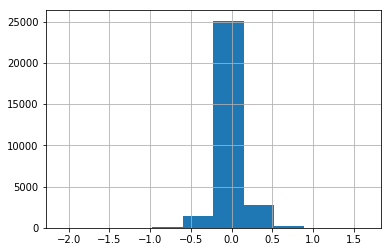

In [73]:
diff.hist()

## Subselect genes based on having fold change > 1

In [ ]:
diff[ diff.abs() > 1 ]

## Get gene expression difference and p-value for desired comparisons

Use Wilcoxon rank-sum statistic for two samples to test if the reads for a given gene across comparison groups come from different distributions.

In [75]:
from scipy.stats import ranksums

In [76]:
ranksums( [1,2,3,4], [5,6,7,8])

RanksumsResult(statistic=-2.3094010767585034, pvalue=0.020921335337794014)

In [77]:
ranksums( [1,2,3,4], [50,60,70,80])

RanksumsResult(statistic=-2.3094010767585034, pvalue=0.020921335337794014)

In [78]:
ranksums( [1,2,3,5], [4,6,7,8])

RanksumsResult(statistic=-2.0207259421636903, pvalue=0.043308142810791955)

### Go row-by-row doing significance test

In [79]:
import time

In [80]:
# create an empty list onto which we can append p-values
pval_list = []

In [81]:
t1 = time.time()

# iterate over every gene
for gene in br1.index:
    
    # subselect the expression values for the corresponding gene
    vals1 = br1.loc[ gene ]
    vals2 = br2.loc[ gene ]
    
    # Do the statistical test for this gene
    statistic, pvalue = ranksums( vals1, vals2 )
    
    # save the p-value
    pval_list.append( pvalue )

t2 = time.time()
print( "This operation took", t2-t1, "seconds.")

This operation took 13.183716058731079 seconds.


In [82]:
len(pval_list)

29784

In [83]:
# One-liner!
t1 = time.time()
pval_list = [ ranksums(a,b)[1] for a, b in zip( br1.as_matrix(), br2.as_matrix() ) ]
t2 = time.time()
print( "This operation took", t2-t1, "seconds.")

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


This operation took 4.83489203453064 seconds.


## Combine fold change and p-value into one DataFrame

* Problem 1: the diff object is just one column (a Pandas "<code>Series</code>" object), not a full-fledged <code>DataFrame</code>
* Problem 2: the p-values are stored in a simple Python <code>list</code>
* Solution: use the <code>to_frame()</code> function to turn the <code>Series</code> into a <code>DataFrame</code>, then add the p-values as a new column to that <code>DataFrame</code>.

In [84]:
type( diff )

pandas.core.series.Series

In [85]:
diff.head()

Symbol
A1bg    -0.116
A1cf     0.012
A1i3    -0.015
A26c2    0.151
A2m     -0.772
dtype: float64

In [86]:
combined = diff.to_frame()

In [87]:
combined.head()

,0
Symbol,
A1bg,-0.116
A1cf,0.012
A1i3,-0.015
A26c2,0.151
A2m,-0.772


In [88]:
combined = diff.to_frame( name='fold')

In [89]:
combined.head()

,fold
Symbol,
A1bg,-0.116
A1cf,0.012
A1i3,-0.015
A26c2,0.151
A2m,-0.772


In [90]:
combined[ 'pvals' ] = pval_list

In [91]:
combined.head()

,fold,pvals
Symbol,,
A1bg,-0.116,0.149
A1cf,0.012,0.564
A1i3,-0.015,0.564
A26c2,0.151,0.149
A2m,-0.772,0.021


In [92]:
combined.shape

(29784, 2)

## Subselect genes with fold change > 1

In [93]:
combined[ combined.fold.abs() > 1 ]

,fold,pvals
Symbol,,
Adam33,1.231,0.021
C1ql2,-1.092,0.021
Cd3e,-1.243,0.021
Chst9,-1.406,0.021
Cox6a2,1.153,0.021
Csap1,-1.359,0.021
Cxcr1,-1.511,0.021
Cyp11b1,1.640,0.021
Dpp4,1.057,0.021


## Subselect genes with fold change > 1 AND p-value < 0.05

In [94]:
combined[ (combined.fold.abs() > 1) & (combined.pvals < 0.05) ]

,fold,pvals
Symbol,,
Adam33,1.231,0.021
C1ql2,-1.092,0.021
Cd3e,-1.243,0.021
Chst9,-1.406,0.021
Cox6a2,1.153,0.021
Csap1,-1.359,0.021
Cxcr1,-1.511,0.021
Cyp11b1,1.640,0.021
Dpp4,1.057,0.021


In [95]:
plot_these = combined[ (combined.fold.abs() > 1) & (combined.pvals < 0.05) ]

In [96]:
len(plot_these)

36

Turn the row labels into variables in their own right:

In [97]:
plot_these['Gene'] = plot_these.index

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [98]:
plot_these.sort_values(by='fold', inplace=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Generate RibbonPlot

### Load some of Python's figure-making libraries:

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

### Set the style of the figure

When using the plotting package seaborn, there are five figure [styles](https://seaborn.pydata.org/tutorial/aesthetics.html) to choose from:
1. darkgrid
2. whitegrid
3. dark
4. white
5. ticks

In [100]:
sns.set( style="whitegrid" )

### Making the figure 

Text(0.5,0,'Fold change')

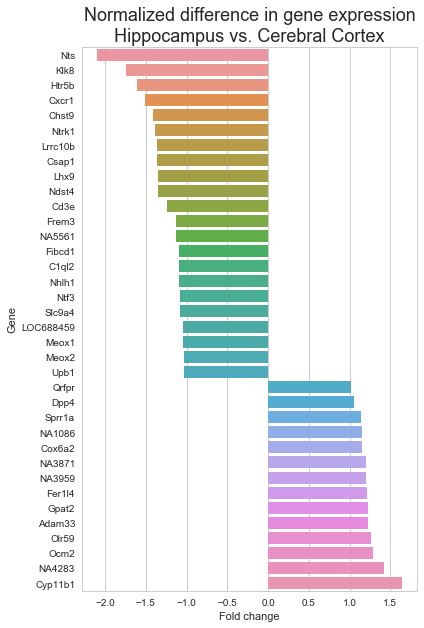

In [101]:
# I want this figure to be 6 inches wide and 10 inches tall
fig_dimensions=(6, 10)

# Create a blank figure to hang the data off of
figure, axes = plt.subplots( figsize=fig_dimensions )

# Plot the data onto the figure
sns.barplot( data=plot_these, x="fold", y="Gene" )

# Assign a title to the figure
chart_title = """Normalized difference in gene expression
Hippocampus vs. Cerebral Cortex"""
axes.set_title( chart_title, size=18 )

# Assign a label to the x-axis
axes.set_xlabel( "Fold change" )

### Save the figure as a PDF:

In [ ]:
figure.savefig( "ribbonplot.pdf")